In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Clean_Churn_data.csv')

In [4]:
data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,5,9305-CDSKC,Female,0,0,0,8,1,Yes,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,6,1452-KIOVK,Male,0,0,1,22,1,Yes,Fiber optic,...,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,7,6713-OKOMC,Female,0,0,0,10,0,No phone service,DSL,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,8,7892-POOKP,Female,0,1,0,28,1,Yes,Fiber optic,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,9,6388-TABGU,Male,0,0,1,62,1,No,DSL,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [5]:
del data['Unnamed: 0']

In [15]:
data2 = data.copy()

In [20]:
contractdata = pd.get_dummies(data2['Contract'])

In [27]:
data = data.join(contractdata)

In [31]:
import statsmodels.api as sm

X = data[['Partner', 'MonthlyCharges', 'Month-to-month', 'One year', 'Two year', 'PaperlessBilling']]## X usually means our input variables (or independent variables)
y = data['tenure'] ## Y usually means our output/dependent variable
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input) #ordinary least squares = OLS
predictions = model.predict(X)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1859.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:44:55   Log-Likelihood:                -29574.
No. Observations:                7043   AIC:                         5.916e+04
Df Residuals:                    7037   BIC:                         5.920e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.8334      0.374     39.700      0.000      14.101      15.566
Partner              7.9060      0.406     19.484      0.000       7.111       8.701
MonthlyCharges       0.2193      0.007     31.896      0.000       0.206       0.233
Month-to-month     -15.1702      0.278    -54.580      0.000     -15.715     -14.625
One year             7.6803      0.357     21.495      0.000       6.980       8.381
Two year            22.3233      0.347     64.302      0.000      21.643      23.004
PaperlessBilling     1.4942      0.424      3.528      0.000       0.664       2.324
==============================================================================
Omnibus:                       38.146   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.315
Skew:                           0.165   Prob(JB):                     2.90e-09
Kurtosis:                       3.160   Cond. No.                     3.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

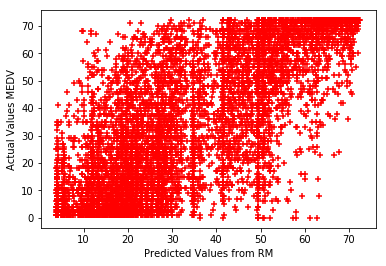

MSE: 483421.906847


In [33]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print("MSE:", model.mse_model) ## mean squared error

In [36]:
paymentmethdata = pd.get_dummies(data2['PaymentMethod'])
paymentmethdata

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
5,0,0,1,0
6,0,1,0,0
7,0,0,0,1
8,0,0,1,0
9,1,0,0,0


In [37]:
data = data.join(paymentmethdata)

In [38]:
import statsmodels.api as sm

X = data[['Partner', 'MonthlyCharges', 'Month-to-month', 'One year', 'Two year', 'PaperlessBilling', 
          'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']]## X usually means our input variables (or independent variables)
y = data['tenure'] ## Y usually means our output/dependent variable
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() ## sm.OLS(output, input) #ordinary least squares = OLS
predictions = model.predict(X)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1282.
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        12:49:29   Log-Likelihood:                -29371.
No. Observations:                7043   AIC:                         5.876e+04
Df Residuals:                    7034   BIC:                         5.882e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        13.7522      0.326     42.234      0.000      13.114      14.391
Partner                       7.3704      0.395     18.646      0.000       6.596       8.145
MonthlyCharges                0.1941      0.007     27.283      0.000       0.180       0.208
Month-to-month              -14.2342      0.281    -50.685      0.000     -14.785     -13.684
One year                      7.1408      0.342     20.861      0.000       6.470       7.812
Two year                     20.8456      0.342     60.969      0.000      20.175      21.516
PaperlessBilling              1.1771      0.414      2.845      0.004       0.366       1.988
Bank transfer (automatic)     7.8617      0.362     21.695      0.000       7.151       8.572
Credit card (automatic)       7.0440      0.363     19.386      0.000       6.332       7.756
Electronic check              1.2356      0.355      3.483      0.000       0.540       1.931
Mailed check                 -2.3892      0.345     -6.925      0.000      -3.065      -1.713
==============================================================================
Omnibus:                       43.009   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.518
Skew:                           0.175   Prob(JB):                     2.15e-10
Kurtosis:                       3.173   Cond. No.                     5.69e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

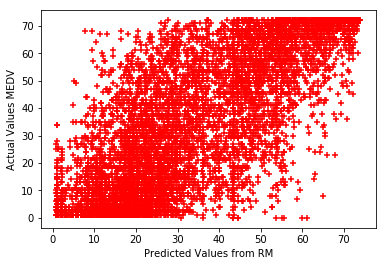

MSE: 314941.81548


In [40]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print("MSE:", model.mse_model) ## mean squared error

In [42]:
import statsmodels.formula.api as sm

In [48]:
data = data.rename(columns={'Bank transfer (automatic)': 'bankauto', 'Credit card (automatic)': 'cardauto', 'Bank Transfer (automatic)': 'BankXferauto', 'Credit card': 'cardauto', 'Electronic check':'echeck'})

In [49]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Month-to-month,oneyr,twoyr,bankauto,cardauto,echeck,mailedcheck
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,29.85,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,56.95,1889.5,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,53.85,108.15,1,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,70.70,151.65,1,1,0,0,0,0,1,0


In [54]:
data = data.rename(columns={'Month-to-month': 'month2month'})

In [55]:
model = sm.logit("Churn ~ Partner + MonthlyCharges + month2month + oneyr + twoyr + PaperlessBilling + bankauto + cardauto + echeck + mailedcheck",data = data).fit()

Optimization terminated successfully.
         Current function value: 0.448311
         Iterations 34


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7034
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                  0.2252
Time:                        13:04:02   Log-Likelihood:                -3157.5
converged:                       True   LL-Null:                       -4075.1
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9840   9.91e+06     -2e-07      1.000   -1.94e+07    1.94e+07
Partner             -0.3276      0.065     -5.019      0.000      -0.456      -0.200
MonthlyCharges       0.0151      0.001     11.504      0.000       0.013       0.018
month2month          0.8367   7.01e+06   1.19e-07      1.000   -1.37e+07    1.37e+07
oneyr               -0.7685   7.01e+06   -1.1e-07      1.000   -1.37e+07    1.37e+07
twoyr               -2.0523   7.01e+06  -2.93e-07      1.000   -1.37e+07    1.37e+07
PaperlessBilling     0.4074      0.070      5.791      0.000       0.269       0.545
bankauto            -0.6792   1.67e+07  -4.06e-08      1.000   -3.28e+07    3.28e+07
cardauto            -0.7628   1.67e+07  -4.56e-08      1.000   -3.28e+07    3.28e+07
echeck              -0.0270   1.67e+07  -1.61e-09      1.000   -3.28e+07    3.28e+07
mailedcheck         -0.5150   1.67e+07  -3.08e-08      1.000   -3.28e+07    3.28e+07
====================================================================================
"""